<a href="https://colab.research.google.com/github/miguelrendon107/Analitica/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL 1**

# **Librerias y Datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficador
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

#Se cambia en la variable "sex" F-> 0 y M-> 1
data=pd.read_excel("/content/4. BD_Parcial_L_int.xlsx", sheet_name=0)
data= data.dropna()

datax= (data[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent', 'Grad']])


bdx= np.array(data.iloc[:, 1:6])
bdy= np.array(data.iloc[:, 6])

[[   1.      4.14 1410.      2.95    1.  ]
 [   1.      3.3  1260.      2.79    1.  ]
 [   0.      4.3   950.      2.85    0.  ]
 ...
 [   0.      3.74 1140.      2.28    0.  ]
 [   1.      3.75 1260.      3.19    1.  ]
 [   0.      3.08  950.      2.09    0.  ]]


# **Correlación**

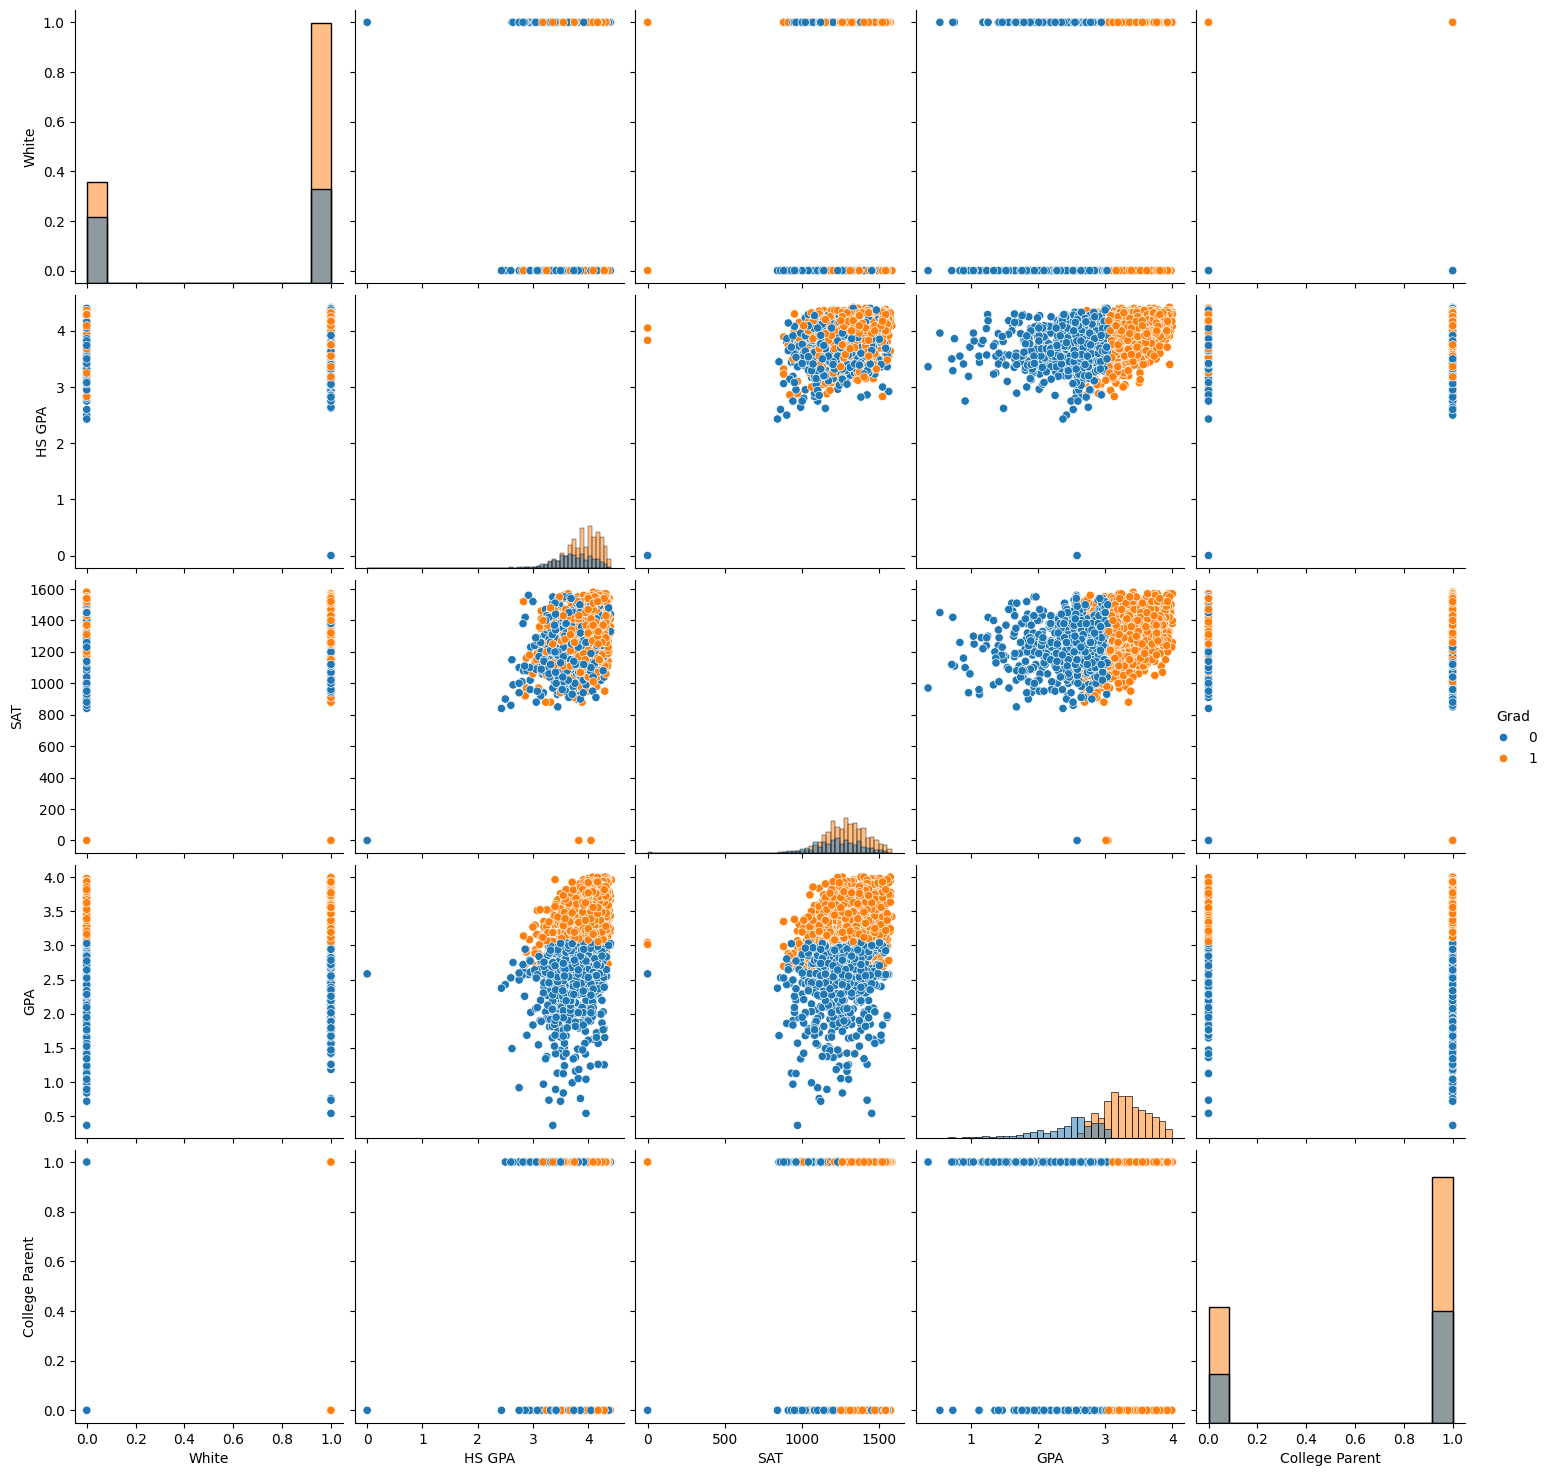

In [ ]:
#GRAFICAS DE CORRELACION DE LAS VARIABLES

sns.pairplot(datax, hue='Grad', height=3, vars= ['White', 'HS GPA', 'SAT', 'GPA', 'College Parent'], diag_kind='hist')
plt.show()

Esta es la matriz de la correlacion:
                    White    HS GPA       SAT       GPA  College Parent  \
White           1.000000  0.130981  0.191930  0.194132       -0.005987   
HS GPA          0.130981  1.000000  0.346767  0.376932        0.020068   
SAT             0.191930  0.346767  1.000000  0.260927       -0.029768   
GPA             0.194132  0.376932  0.260927  1.000000       -0.015137   
College Parent -0.005987  0.020068 -0.029768 -0.015137        1.000000   
Grad            0.133612  0.283404  0.172794  0.726624       -0.018035   

                    Grad  
White           0.133612  
HS GPA          0.283404  
SAT             0.172794  
GPA             0.726624  
College Parent -0.018035  
Grad            1.000000  


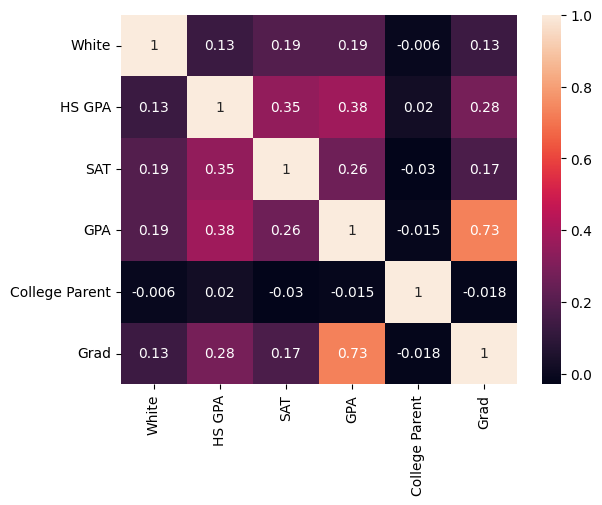

In [ ]:
#MATRIZ DE CORRELACION DE LAS VARIABLES

corr= datax.corr()
print("Esta es la matriz de la correlacion:\n", corr)
sns.heatmap(corr, annot=True)
plt.show()

# **Modelo de Naive Bayes**

In [ ]:
##MODELO DE NAIVE BAYES##
#data[['Sex', 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent','Grad']]
np.set_printoptions(suppress=True, precision=2)

mnb= GaussianNB()
#Entrenamiento del modelo
mnb.fit(bdx, bdy)
#Predicción de los datos de entrenamiento
ydp= mnb.predict(bdx)

u=mnb.theta_ #se estiman las medias
sigma=np.sqrt(mnb.var_) #se estiman las varianzas
print("Las Medias son:\n", u)
print("Las Varianzas son:\n", sigma)

##INTERVALOS VARIABLES##

LI= u-sigma #Limite inferior
LS= u+sigma #Limite superior
print("Los Limites inferiores son:\n", LI)
print("Los Limites superiores son:\n", LS)

Las Medias son:
 [[   0.59    3.71 1234.85    2.43    0.7 ]
 [   0.72    3.91 1288.55    3.29    0.68]]
Las Varianzas son:
 [[  0.49   0.38 151.66   0.48   0.46]
 [  0.45   0.29 136.44   0.32   0.47]]
Los Limites inferiores son:
 [[   0.09    3.33 1083.2     1.96    0.24]
 [   0.27    3.62 1152.11    2.97    0.21]]
Los Limites superiores son:
 [[   1.08    4.09 1386.51    2.91    1.16]
 [   1.17    4.21 1424.99    3.6     1.15]]


- White -> No graduados: [0.09-1.08]; Graduados: [0.27-1.17]
- HSGPA (Calificaciones de preparatoria) -> No graduados: [3.33-4.09]; Graduados: [3.62-4.21]
- SAT -> No graduados: [1083.2-1386.51]; Graduados: [1152.11-1424.99]
- GPA (Promedio universitario) -> No graduados: [1.96-2.91]; Graduados: [2.97-3.60]
- College Parent -> No graduados: [0.24-1.16]; Graduados: [0.21-1.15]

In [ ]:
##MATRIZ DE CONFUSIÓN PARA EL MODELO DE NAIVE BAYES##
cm= confusion_matrix(bdy, ydp)
print("Esta es la matriz de confusión para el modelo de Naive Bayes:\n", cm)

VN= cm[0,0]; FP= cm[0,1]; FN= cm[1,0]; VP= cm[1,1]

##METRICAS##
print("Exactitud=", round((VP+VN)/(VP+VN+FP+FN)*100, 2), '%')
print("Sensibilidad=", round(VP/(VP+FN)*100, 2), '%')
print("Especificidad=", round(VN/(VN+FP)*100, 2), '%')

Esta es la matriz de confusión para el modelo de Naive Bayes:
 [[ 452  164]
 [ 102 1282]]
Exactitud= 86.7 %
Sensibilidad= 92.63 %
Especificidad= 73.38 %


In [ ]:
##CATEGORIA A LA CUAL PERTENECEN CADA UNO DE LOS INDIVIDUOS DE PRONOSTICO.##

Xun= [[ 1, 4, 1260, 1.9, 1]]
ydun=mnb.predict(Xun)
print("La predicción para el primer estudiante:\n", ydun)

Xun2= [[1, 2.91, 1090, 2.719, 1]]
ydun2=mnb.predict(Xun2)
print("La predicción para el segundo estudiante:\n", ydun2)

Xun3= [[0, 3.58, 1210, 3.319, 1]]
ydun3=mnb.predict(Xun3)
print("La predicción para el tercer estudiante es:\n", ydun3)

La predicción para el primer estudiante:
 [0]
La predicción para el segundo estudiante:
 [0]
La predicción para el tercer estudiante es:
 [1]


# **Modelo Decision Tree**



In [ ]:
##MODELO DE DECISION TREE##

mar= DecisionTreeClassifier(criterion='gini', max_depth=4) #max_depth= niveles o variables de entrada
mar.fit(bdx,bdy)
ydp= mar.predict(bdx)

## MATRIZ DE CONFUSION PARA EL MODELO DECISION TREE##
cm1= confusion_matrix(bdy, ydp)
cm1
print("Esta es la matriz de confusión para el modelo Decision tree:\n", cm1)
VN1= cm1[0,0]; FP1= cm1[0,1]; FN1= cm1[1,0]; VP1= cm1[1,1]

##METRICAS##
print("Exactitud=", round((VP1+VN1)/(VP1+VN1+FP1+FN1)*100, 2), '%')
print("Sensibilidad=", round(VP1/(VP1+FN1)*100, 2), '%')
print("Especificidad=", round(VN1/(VN1+FP1)*100, 2), '%')

##ARBOL DE DECISIÓN##
vs=['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']
dot_graph= export_graphviz (mar, feature_names=vs)
graph= graph_from_dot_data(dot_graph)
graph.write_png("arbol_nuevo.png")
plt.show()

Esta es la matriz de confusión para el modelo Decision tree:
 [[ 422  194]
 [   2 1382]]
Exactitud= 90.2 %
Sensibilidad= 99.86 %
Especificidad= 68.51 %


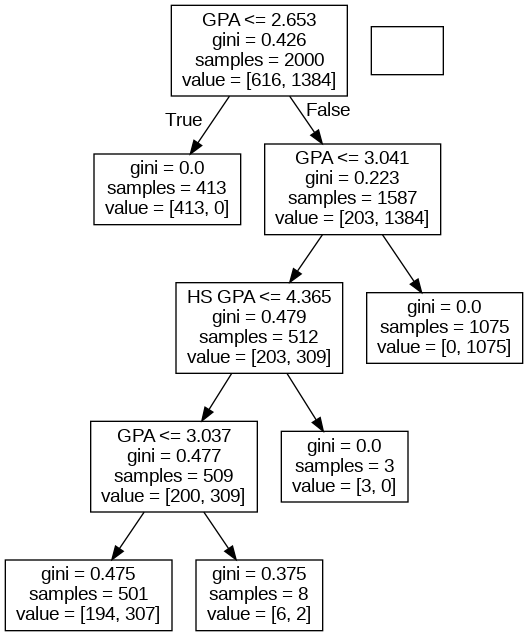

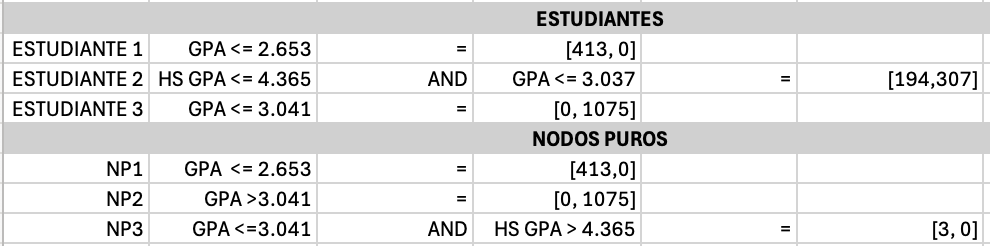

# **Modelo K-Means**

In [ ]:
##MODELO K-MEANS##
np.random.seed (42)

mkm=KMeans(n_clusters=5, init= 'random', random_state=42) #se hace mejor con 5 cluster
mkm.fit(bdx, bdy)
labels=mkm.labels_
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
##MODELO PARA CADA UNO DE LOS ESTUDIANTES (HOJA PRONOSTICO)

XDP2= np.array([[1, 4, 1260, 1.9, 1]])
ydp2=mkm.predict(XDP2)
print('El primer estudiante quedo en el cluster:', ydp2)

if ydp2[0] == 1:
    print("Si va a lograr su grado en cuatro años")
else:
    print("No va a lograr su grado en cuatro años")

xdp3= np.array([[ 1, 2.19, 1090, 2.719, 1]])
ydp3=mkm.predict(xdp3)
print('El segundo estudiante quedo en el cluster:', ydp3)
if ydp3[0] == 1:
    print("Si va a lograr su grado en cuatro años")
else:
    print("No va a lograr su grado en cuatro años")

xdp4= np.array([[ 0, 3.58, 1210, 3.319, 1]])
ydp4=mkm.predict(xdp4)
print('El tercer estudiante quedo en el cluster:', ydp4)
if ydp4[0] == 1:
    print("Si va a lograr su grado en cuatro años")
else:
    print("No va a lograr su grado en cuatro años")

El primer estudiante quedo en el cluster: [3]
No va a lograr su grado en cuatro años
El segundo estudiante quedo en el cluster: [0]
No va a lograr su grado en cuatro años
El tercer estudiante quedo en el cluster: [1]
Si va a lograr su grado en cuatro años


In [ ]:
##PORCENTAJE Y CANTIDAD DE ESTIUDIANTEGS QUE LOGRAN GRADUARSE EN 4 AÑOS##

# Cluster 0
c0 = len(np.where((labels == 0) & (bdy == 0))[0])
c01 = len(np.where((labels == 0) & (bdy == 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 0:', c01)
print("El porcentaje de que logra su grado en 4 años para el cluster 0 es:", round(c01 / (c0 + c01) * 100, 2), '%')

# Cluster 1
c10 = len(np.where((labels == 1) & (bdy == 0))[0])
c11 = len(np.where((labels == 1) & (bdy == 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 1:', c11)
print("El porcentaje de que logra su grado en 4 años para el cluster 1 es:", round(c11 / (c10 + c11) * 100, 2), '%')

# Cluster 2
c20 = len(np.where((labels == 2) & (bdy == 0))[0])
c21 = len(np.where((labels == 2) & (bdy == 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 2:', c21)
print("El porcentaje de que logra su grado en 4 años para el cluster 2 es:", round(c21 / (c20 + c21) * 100, 2), '%')

# Cluster 3
c30 = len(np.where((labels == 3) & (bdy == 0))[0])
c31 = len(np.where((labels == 3) & (bdy == 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 3:', c31)
print("El porcentaje de que logra su grado en 4 años para el cluster 3 es:", round(c31 / (c30 + c31) * 100, 2), '%')

c40 = len(np.where((labels == 4) & (bdy == 0))[0])
c41 = len(np.where((labels == 4) & (bdy == 1))[0])

print('Cantidad de estudiantes que logran graduarse en 4 años en el cluster 4:', c41)
print("El porcentaje de que logra su grado en 4 años para el cluster 4 es:", round(c41 / (c40 + c41) * 100, 2), '%')

Cantidad de estudiantes que logran graduarse en 4 años en el cluster 0: 131
El porcentaje de que logra su grado en 4 años para el cluster 0 es: 48.7 %
Cantidad de estudiantes que logran graduarse en 4 años en el cluster 1: 371
El porcentaje de que logra su grado en 4 años para el cluster 1 es: 66.97 %
Cantidad de estudiantes que logran graduarse en 4 años en el cluster 2: 370
El porcentaje de que logra su grado en 4 años para el cluster 2 es: 75.82 %
Cantidad de estudiantes que logran graduarse en 4 años en el cluster 3: 510
El porcentaje de que logra su grado en 4 años para el cluster 3 es: 74.34 %
Cantidad de estudiantes que logran graduarse en 4 años en el cluster 4: 2
El porcentaje de que logra su grado en 4 años para el cluster 4 es: 66.67 %


In [ ]:
##CLUSTER CON MAYOR 'HS GPA' & MAYOR 'GPA'##
np.set_printoptions(suppress=True, precision=2)

clusters = mkm.cluster_centers_
clusters = np.round(clusters, 2) #redondear a dos decimales

##CARACTERISTICAS DEMOGRAFICAS DE CADA CLUSTER##
print("Esta es la característica sociodemográfica de cada cluster:\n", clusters)

maxhs= np.argmax(clusters[:,1]) #Cluster con mayor HS GPA
maxgpa= np.argmax(clusters[:,3]) #Cluster con mayor GPA

print('El cluster con mayor HS GPA es:', maxhs)
print('El cluster con mayor GPA es:', maxgpa)

Esta es la característica sociodemográfica de cada cluster:
 [[   0.46    3.64 1053.12    2.71    0.73]
 [   0.64    3.8  1190.72    2.97    0.69]
 [   0.77    3.96 1446.82    3.16    0.66]
 [   0.73    3.9  1304.69    3.09    0.69]
 [   0.67    2.63    0.      2.88    0.67]]
El cluster con mayor HS GPA es: 2
El cluster con mayor GPA es: 2


# **ANALISIS DE RESULTADOS**


El GPA es la variable más importante para predecir si un estudiante logrará graduarse en cuatro años, con una correlación de 0.726 con la graduación. Esto indica que un mejor rendimiento académico en la universidad aumenta significativamente la probabilidad de graduarse a tiempo. Asimismo, el HS GPA (promedio académico en la preparatoria) también es relevante, con una correlación de 0.283, lo que sugiere que un buen desempeño previo influye en el éxito académico universitario. La mayor correlación entre variables se da entre HS GPA y GPA universitario (0.37), lo que sugiere que los estudiantes que destacan en la preparatoria suelen mantener un buen rendimiento en la universidad.

En el **modelo Naive Bayes**, el grupo que obtuvo las mejores calificaciones en la preparatoria (HS GPA de 3.91) y en la universidad (GPA de 3.29) es el grupo 1. Este modelo mostró un buen desempeño general, con una exactitud del 87.6%, una sensibilidad del 93.06%, y una especificidad del 75.32%. La alta sensibilidad indica que el modelo es muy efectivo para identificar a los estudiantes que se gradúan, mientras que la especificidad más baja muestra que tiene más dificultades para identificar correctamente a los que no lo hacen. En cuanto a las predicciones individuales, el modelo clasificó correctamente a los dos primeros estudiantes como no graduados y al tercero como graduado.

El **modelo de Decision Tree** tiene una exactitud ligeramente superior al Naive Bayes, con un 90.2%. Su sensibilidad es extremadamente alta (99.86%), lo que indica que casi todos los estudiantes que se gradúan son identificados correctamente. Sin embargo, su especificidad es más baja (68.51%), lo que significa que clasifica erróneamente a más estudiantes como graduados cuando no lo son. Las reglas generadas por el árbol de decisiones resaltan la importancia del GPA universitario como el principal determinante. Por ejemplo, un estudiante con un GPA menor o igual a 2.653 tiene una probabilidad mucho menor de graduarse, mientras que aquellos con un GPA superior a 3.041 casi siempre se gradúan.

El análisis del **modelo K-Means** revela que es menos preciso para predecir la graduación en cuatro años, con una exactitud menor en comparación con los modelos anteriores. Aunque no se puede construir una matriz de confusión para este modelo, los resultados muestran que el Cluster 2 tiene el mayor porcentaje de graduación (75.82%), seguido por el Cluster 3 (74.34%). El Cluster 2 también destaca por tener el HS GPA más alto (3.96), lo que refuerza la importancia del desempeño académico previo. Tambien tiene el GPA más alto, lo que puede indicar que algunos estudiantes logran mejorar su rendimiento académico en la universidad y, a pesar de no tener un HS GPA tan alto, logran graduarse.

En resumen, los tres modelos destacan la relevancia del GPA universitario como el factor más influyente en la graduación en cuatro años. El modelo de Decision Tree es el más efectivo para predecir la graduación, seguido de cerca por el Naive Bayes, aunque este último ofrece una mayor sensibilidad. El modelo K-Means, aunque menos preciso, proporciona información valiosa sobre los diferentes grupos de estudiantes y sus probabilidades de éxito.

